In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras

In [2]:
tf.debugging.set_log_device_placement(False)

In [3]:
# Check if GPU is available
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = tf.matmul(a, b)
print(c)

# Place tensors on the GPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = tf.matmul(a, b)
print(c)

2.10.1
Num GPUs Available:  1
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [24]:
# Set random seed for reproducibility
np.random.seed(2488)

# Set the dimensions of our noise vector
noise_dim = 100

# Set the training parameters
batch_size = 16
steps_per_epoch = 2000
epochs = 25

# Set the dimensions of our image
img_rows, img_cols, channels = 28, 28, 1

# Set the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Set model name
model_name = "fcgan_mnist"

In [25]:
# Load the MNIST dataset
(x_train, y_train), (x_tet, y_test) = keras.datasets.mnist.load_data()

# Reshape and normalize the data
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = x_train.reshape(-1, img_rows*img_cols*channels)

In [26]:
# Build the generator
def build_generator():
    generator = keras.models.Sequential()
    
    generator.add(keras.layers.Dense(256, input_dim=noise_dim))
    generator.add(keras.layers.LeakyReLU(0.2))
    
    generator.add(keras.layers.Dense(512))
    generator.add(keras.layers.LeakyReLU(0.2))
    
    generator.add(keras.layers.Dense(1024))
    generator.add(keras.layers.LeakyReLU(0.2))
    
    generator.add(keras.layers.Dense(img_rows*img_cols*channels, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [27]:
# Build the discriminator
def build_discriminator():
    discriminator = keras.models.Sequential()
    
    discriminator.add(keras.layers.Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(keras.layers.LeakyReLU(0.2))
    
    discriminator.add(keras.layers.Dense(512))
    discriminator.add(keras.layers.LeakyReLU(0.2))
    
    discriminator.add(keras.layers.Dense(256))
    discriminator.add(keras.layers.LeakyReLU(0.2))
    
    discriminator.add(keras.layers.Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer = optimizer)

    return discriminator

In [28]:
# Build and compile the discriminator/generator
discriminator = build_discriminator()
generator = build_generator()

# Make the discriminator not trainable
discriminator.trainable = False

# Build the GAN layers
gan_input = keras.layers.Input(shape=(noise_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

# Compile the GAN model
gan = keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [29]:
#Code for plotting results
def show_images(noise, size_fig, epoch):
    generated_images = generator.predict(noise, verbose=False)
    plt.figure(figsize=size_fig)
    
    for i, image in enumerate(generated_images):
        plt.subplot(size_fig[0], size_fig[1], i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    filename = f"{model_name}_plot_e{epoch+1}.png"
    plt.savefig(f"images\\{model_name}\\{filename}")
    plt.show()

Epoch 1/25: [====================] D-Loss: 0.24268  G-Loss: 2.2286



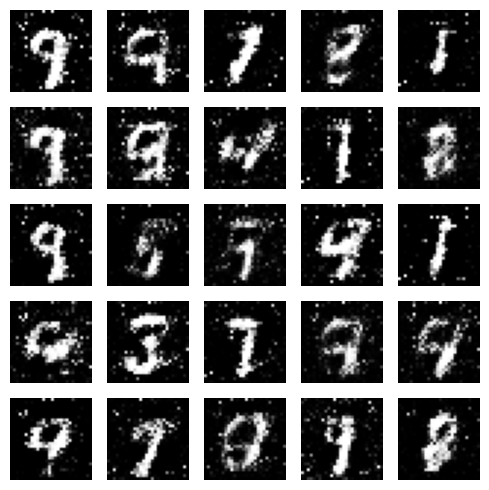

Epoch 2/25: [====================] D-Loss: 0.50144  G-Loss: 1.48108



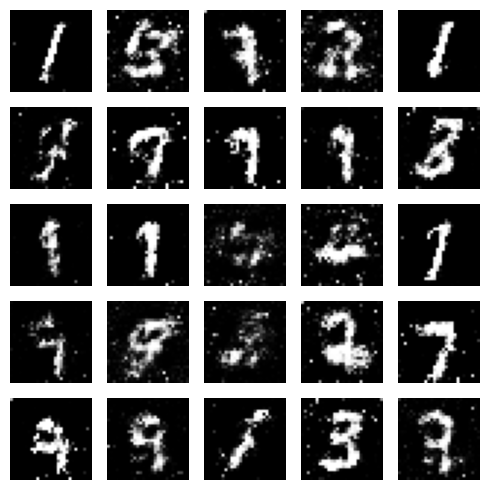

Epoch 3/25: [====================] D-Loss: 0.41184  G-Loss: 1.85474



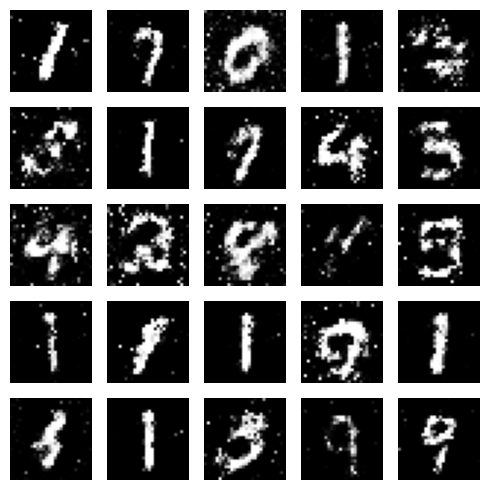

Epoch 4/25: [====================] D-Loss: 0.40936  G-Loss: 1.90414



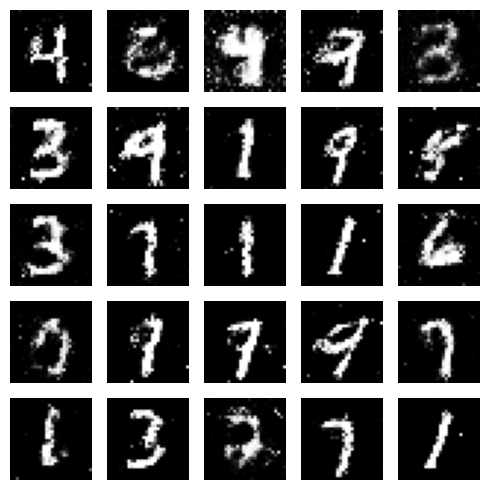

Epoch 5/25: [====================] D-Loss: 0.57717  G-Loss: 1.48054



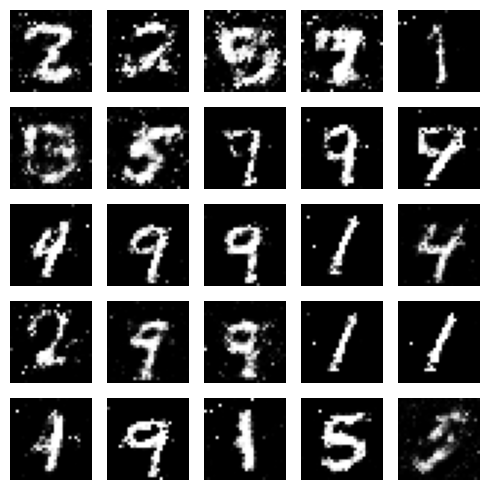

Epoch 6/25: [====================] D-Loss: 0.52608  G-Loss: 1.33322



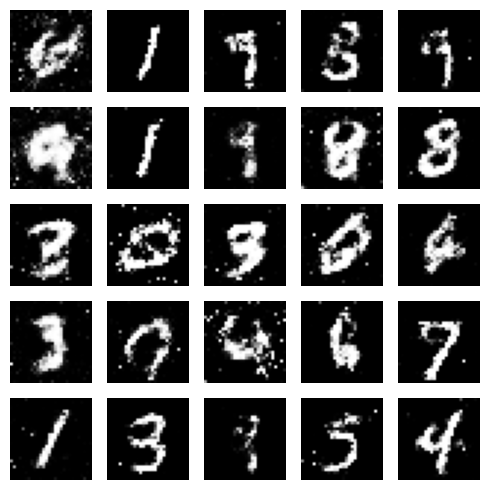

Epoch 7/25: [====================] D-Loss: 0.38358  G-Loss: 1.60102



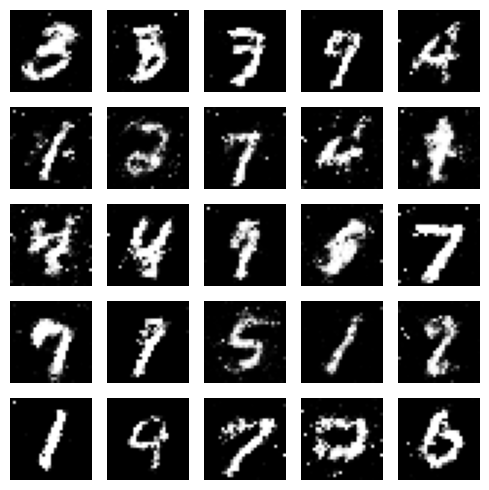

Epoch 8/25: [====================] D-Loss: 0.48731  G-Loss: 1.45314



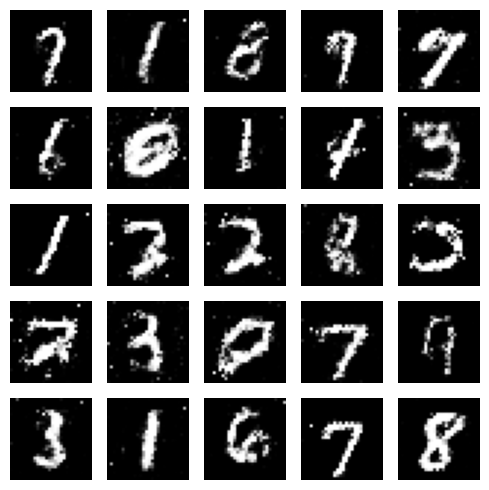

Epoch 9/25: [====================] D-Loss: 0.58973  G-Loss: 1.54421



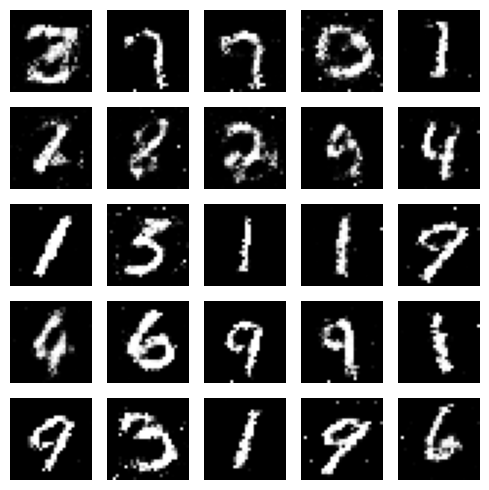

Epoch 10/25: [====================] D-Loss: 0.59461  G-Loss: 1.24742



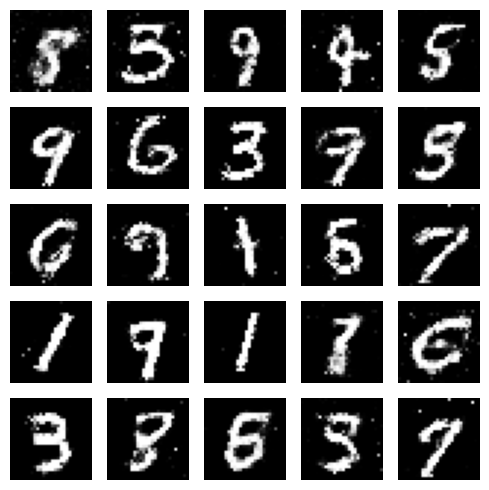

Epoch 11/25: [====================] D-Loss: 0.54977  G-Loss: 1.39293



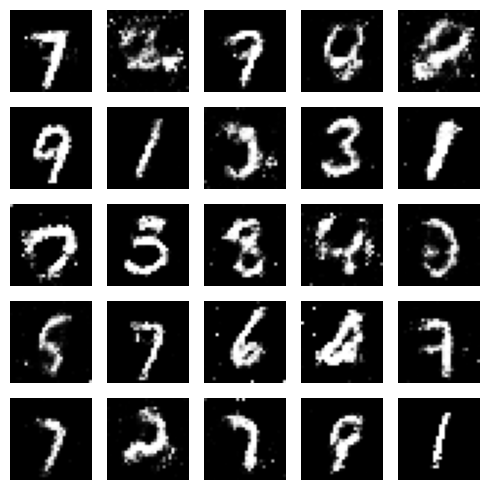

Epoch 12/25: [====================] D-Loss: 0.51452  G-Loss: 1.36646



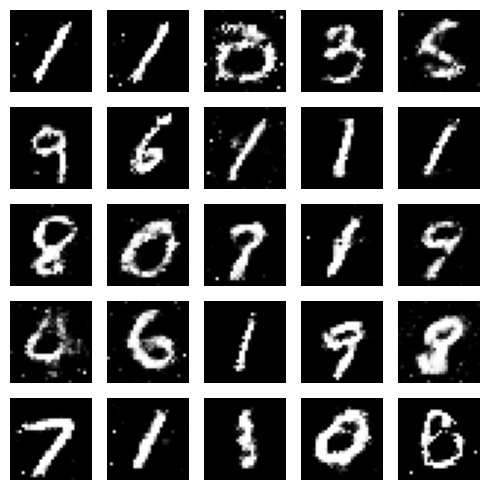

Epoch 13/25: [====================] D-Loss: 0.66225  G-Loss: 1.38852



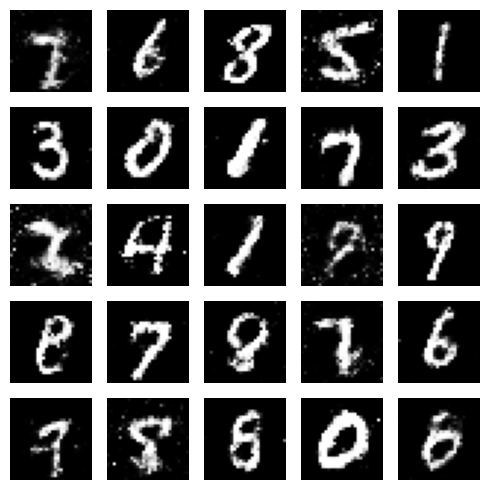

Epoch 14/25: [====================] D-Loss: 0.45094  G-Loss: 1.60549



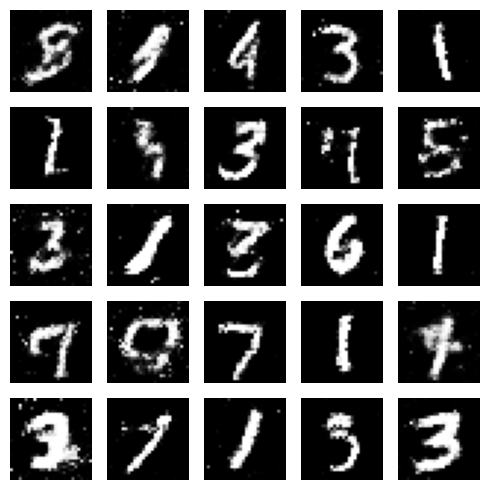

Epoch 15/25: [====================] D-Loss: 0.49106  G-Loss: 1.36947



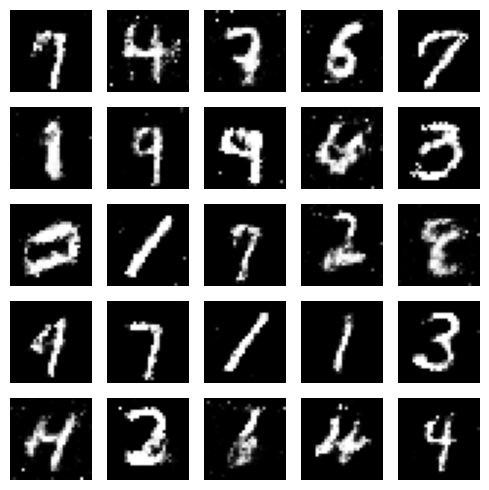

Epoch 16/25: [====================] D-Loss: 0.52621  G-Loss: 1.65161



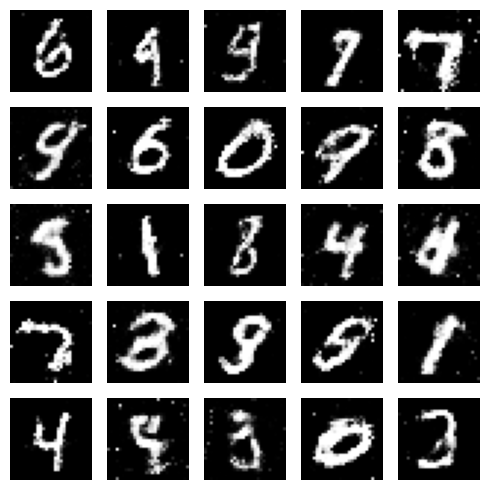

Epoch 17/25: [====================] D-Loss: 0.46446  G-Loss: 1.57123



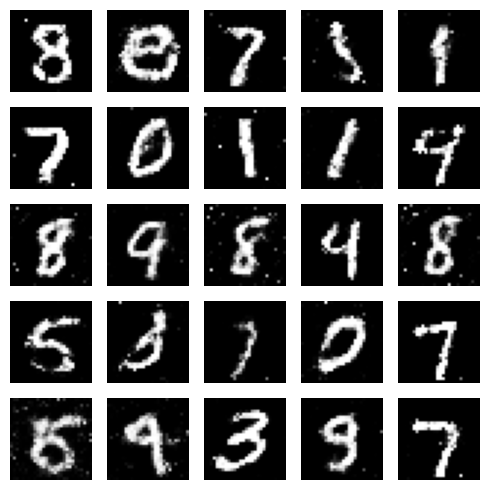

Epoch 18/25: [====================] D-Loss: 0.49642  G-Loss: 2.20334



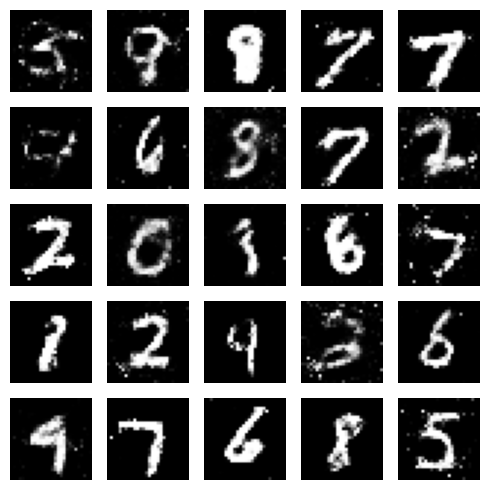

Epoch 19/25: [====================] D-Loss: 0.59465  G-Loss: 1.48957



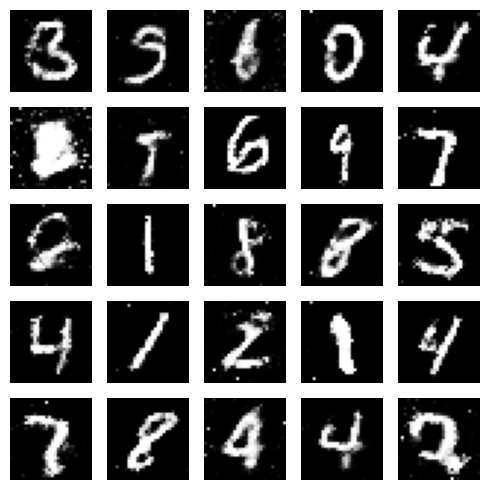

Epoch 20/25: [====================] D-Loss: 0.46181  G-Loss: 1.30969



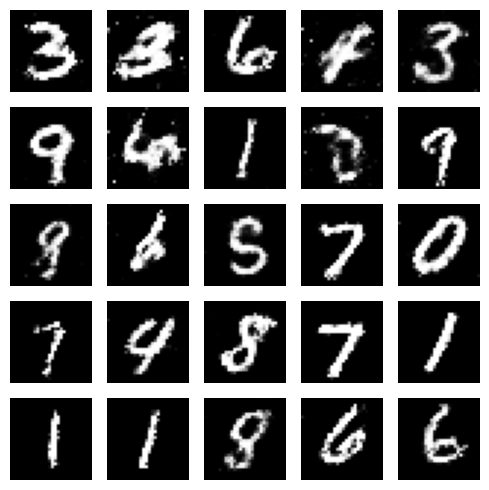

Epoch 21/25: [====================] D-Loss: 0.54337  G-Loss: 1.21205



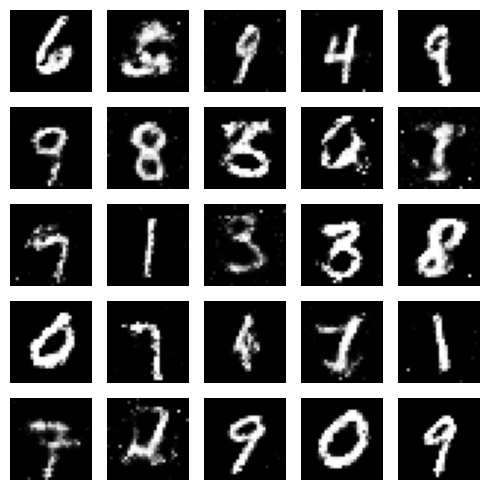

Epoch 22/25: [====================] D-Loss: 0.63655  G-Loss: 1.39116



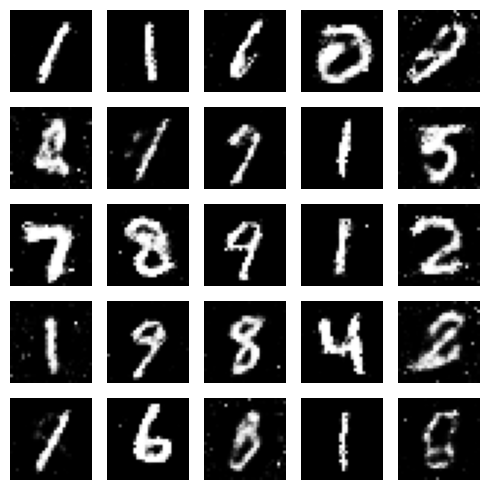

Epoch 23/25: [====================] D-Loss: 0.50954  G-Loss: 1.27147



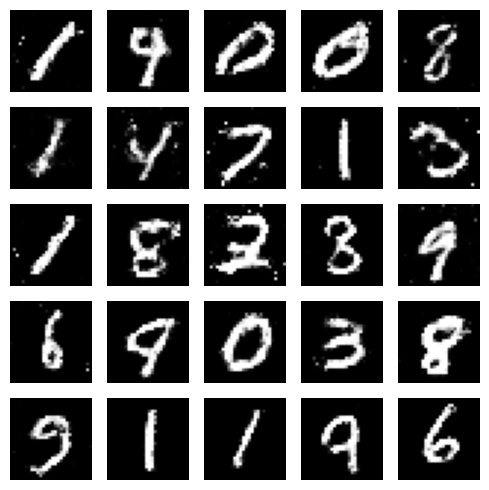

Epoch 24/25: [====================] D-Loss: 0.52623  G-Loss: 1.59887



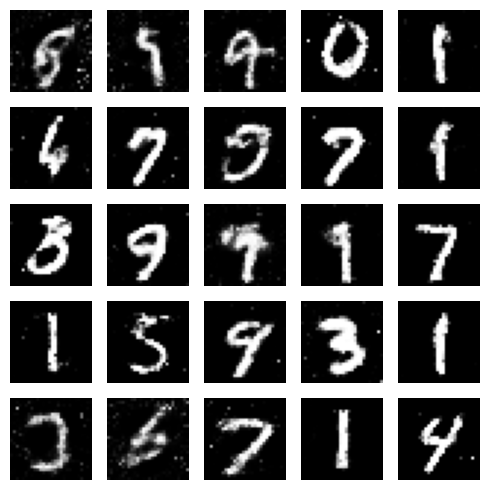

Epoch 25/25: [====================] D-Loss: 0.55102  G-Loss: 1.65388



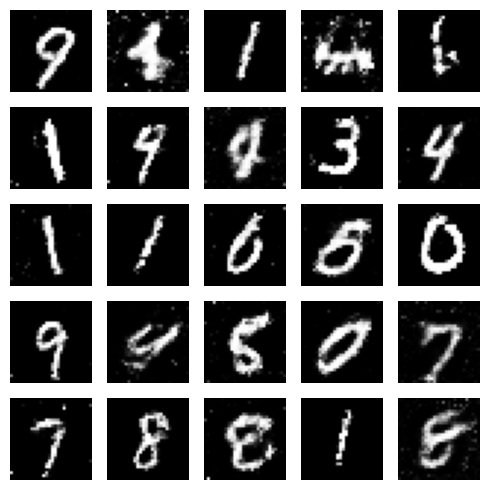

In [30]:
with tf.device('/GPU:0'):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}: [", end="")
        for batch in range(steps_per_epoch):
            # Generate noise and fake images with the generator
            noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
            x_fake = generator.predict(noise, verbose=False)

            # Get real images from the dataset and concatenate with fake images
            x_real = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
            x = np.concatenate((x_real, x_fake))

            # Create labels for real and fake images
            y_disc = np.zeros(2*batch_size)
            y_disc[:batch_size] = 1

            # Train the discriminator on the images
            d_loss = discriminator.train_on_batch(x, y_disc)

            # Train GAN on the noise
            y_gen = np.ones(batch_size)
            g_loss = gan.train_on_batch(noise, y_gen)

            # Print progress
            if batch % (steps_per_epoch/20) == 0:
                string = f"Epoch {epoch+1}/{epochs}: ["
                for _ in range(int(batch//(steps_per_epoch/20)+1)):
                    string += "="
                for _ in range(20 - int(batch//(steps_per_epoch/20)+1)):
                    string += " "
                len_steps = len(str(steps_per_epoch))
                len_string = len(string) + 3 + (len_steps*2)
                string += f"] {batch+(int(steps_per_epoch/20))}/{steps_per_epoch}"
                while len(string) != len_string:
                    string += " "
                print(string, end='\r')
            batch += 1

        # Print loss values and show generated images
        print(f"{string}  D-Loss: {round(d_loss, 5)}  G-Loss: {round(g_loss, 5)}")
        show_images(np.random.normal(0, 1, size=(25, noise_dim)), (5, 5), epoch)

In [32]:
generator.save('models\\mnist_generator_25.h5')
discriminator.save('models\\mnist_discriminator_25.h5')
gan.save('models\\mnist_gan_25.h5')